**Bengaluru House Data**

* What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

# Make a Model which can make a pridiction about the price

In [ ]:
import pandas as pd
df = pd.read_csv('/content/archive (4).zip')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

* So many values from society are missing  so drop society . Also , remove availability also because 90% approx are ready to move.

In [ ]:
df1 = df.drop(['availability' , 'society'] , axis='columns')

In [ ]:
df1.shape

(13320, 7)

In [ ]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df2 = df1.dropna()     # Dropped all sampless with null values

In [ ]:
# Handle size now

In [ ]:
df2['size'].apply(lambda x : x[0]) 

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13317    2
13318    4
13319    1
Name: size, Length: 12710, dtype: object

In [ ]:
df2['size'] = df2['size'].apply(lambda x : int(x[0])) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [ ]:
df2.dtypes

area_type      object
location       object
size            int64
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

* Square feet need to be numerical.

* First of all make sure that size column is numerical . Then  work on square feet.

* There are some digits which are float values . But there are some digits which are like 2100-2850 , for them we create a function which which take average of that . If it is a single digit then we cannot take average so convert directly float values. Apart from them if there is some other possibility like units are different or anything else that will be considered as exception so make it 0.

In [ ]:
t = '2100 - 2850'

len(t.split('-'))
(float(t.split('-')[0]) + float(t.split('-')[1]))/2

2475.0

In [ ]:
def convert_total_sqft(x):
    try:
      if len(x.split('-')) > 1:    # If we have two value take average of them
        return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
      else:
        return float(x)  # If we have single value use as it is float of that value.
    except:
      return 0

In [ ]:
df2['total_sqft'].apply(convert_total_sqft)

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12710, dtype: float64

In [ ]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_total_sqft)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['total_sqft'] ==0   # Toal 42 zeros in the sample

0        False
1        False
2        False
3        False
4        False
         ...  
13314    False
13315    False
13317    False
13318    False
13319    False
Name: total_sqft, Length: 12710, dtype: bool

In [ ]:
#Removing the samples where total_sqft value is 0
df3 = df2[df2['total_sqft'] != 0]

In [ ]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


In [ ]:
# Add a new column price column to check if there are some outliers or not like prices are justified or not
(df3['price'] * 100000) / df3['total_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13314     6530.612245
13315     6689.834926
13317     5258.545136
13318    10407.336319
13319     3090.909091
Length: 12668, dtype: float64

In [ ]:

df3['PPS'] = (df3['price'] * 100000) / df3['total_sqft']    # PPS price per square feet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [ ]:
df3.describe()

,size,total_sqft,bath,balcony,price,PPS
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,1.266800e+04
mean,2.724029,1511.835167,2.616277,1.585649,105.952648,6.876277e+03
std,1.104660,1162.097276,1.223882,0.816758,131.813137,2.263354e+04
min,1.000000,5.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,49.015000,4.242721e+03
50%,3.000000,1260.000000,2.000000,2.000000,70.000000,5.376344e+03
75%,3.000000,1640.000000,3.000000,2.000000,115.000000,7.142857e+03
max,9.000000,52272.000000,40.000000,3.000000,2912.000000,2.300000e+06


In [ ]:
# PPS depends upon the location also . At some location it is quite high or for some it is quite less

In [ ]:
loc_count = df3['location'].value_counts()
loc_count

Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1259, dtype: int64

In [ ]:
loc_count_more_then_50 = loc_count[loc_count >= 50]
loc_count_more_then_50

Whitefield                  513
Sarjapur  Road              372
Electronic City             300
Kanakpura Road              259
Thanisandra                 230
Yelahanka                   206
Uttarahalli                 186
Hebbal                      173
Raja Rajeshwari Nagar       168
Marathahalli                164
7th Phase JP Nagar          146
Bannerghatta Road           144
Hennur Road                 142
Haralur Road                135
Electronic City Phase II    130
Rajaji Nagar                 99
Chandapura                   98
Bellandur                    91
Electronics City Phase 1     86
Hoodi                        86
KR Puram                     85
Begur Road                   83
Sarjapur                     80
Yeshwanthpur                 78
Kasavanhalli                 77
Harlur                       76
Banashankari                 74
Ramamurthy Nagar             71
Hormavu                      71
Kengeri                      70
Koramangala                  69
Hosa Roa

In [ ]:

df3[df3['location'].apply(lambda x : x in loc_count_more_then_50)]

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,38.00,3247.863248
8,Super built-up Area,Marathahalli,3,1310.0,3.0,1.0,63.25,4828.244275
...,...,...,...,...,...,...,...,...
13311,Plot Area,Ramamurthy Nagar,7,1500.0,9.0,2.0,250.00,16666.666667
13312,Super built-up Area,Bellandur,2,1262.0,2.0,2.0,47.00,3724.247227
13313,Super built-up Area,Uttarahalli,3,1345.0,2.0,1.0,57.00,4237.918216
13315,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926


In [ ]:
df4 = df3[df3['location'].apply(lambda x : x in loc_count_more_then_50)]
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.0,38.00,3247.863248
8,Super built-up Area,Marathahalli,3,1310.0,3.0,1.0,63.25,4828.244275


In [ ]:
df4.groupby('location')['PPS'].aggregate(['min','max'])

,min,max
location,,
7th Phase JP Nagar,3465.346535,16666.666667
8th Phase JP Nagar,3181.818182,22500.000000
Akshaya Nagar,3200.000000,11347.517730
Banashankari,2999.163180,20833.333333
Bannerghatta Road,3034.482759,15933.333333
Begur Road,2783.505155,15000.000000
Bellandur,2922.077922,14285.714286
Bisuvanahalli,2883.720930,8372.093023
Budigere,3950.216450,11250.000000


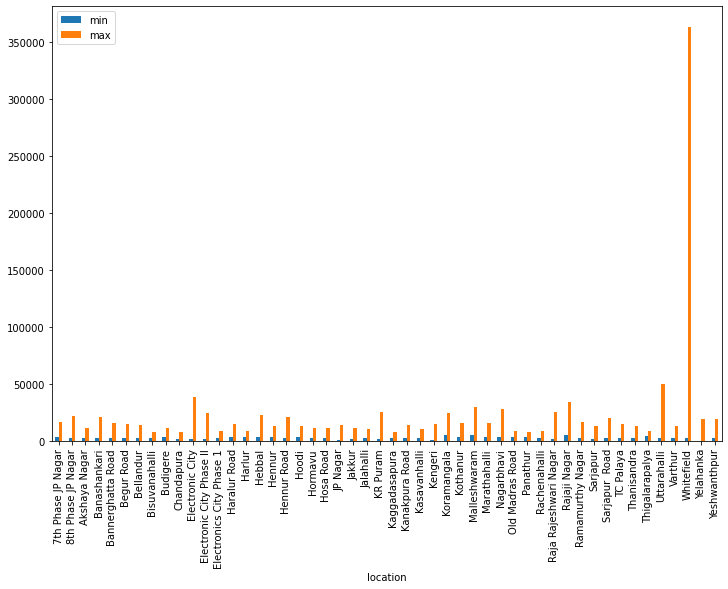

In [ ]:
df4.groupby('location')['PPS'].aggregate(['min','max']).plot.bar(figsize=(12,8))

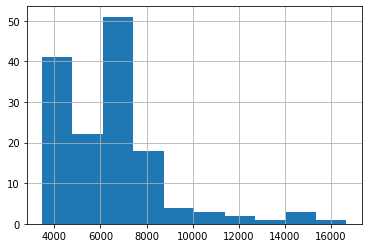

In [ ]:
df3[df3['location'] == '7th Phase JP Nagar'].PPS.hist() #  From 3000-9000 samples are quite high, there are some samples which are very few in count so they are outliers

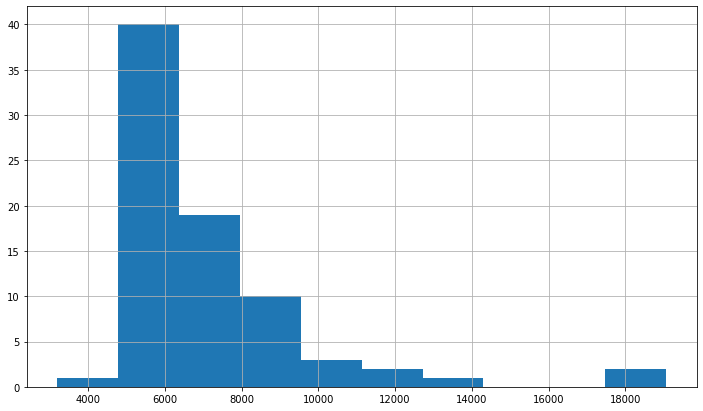

In [ ]:
df3[df3['location'] == 'Yeshwanthpur'].PPS.hist(figsize=(12,7))  # From  4600-8400 approx are very high , and there are very low samples also there in data.

* **Outliers can be obtained in two types**

1.   By histogram plot
2.   By Scatter plot



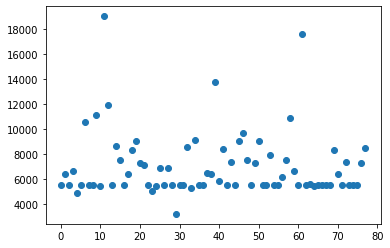

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(range(len(df3[df3['location'] == 'Yeshwanthpur'])) , df3[df3['location'] == 'Yeshwanthpur'].PPS)

plt.show()

In [ ]:
df5 = pd.DataFrame()

for loc,dfloc in df4.groupby('location'):
  m = dfloc['PPS'].mean()
  s = dfloc['PPS'].std()

  extracted_df = dfloc[(dfloc['PPS'] >= (m - 2 * s)) & (dfloc['PPS'] <= (m + 2 * s))]
  df5 = pd.concat([df5,extracted_df] , ignore_index=True)


In [ ]:
df5

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.00,3800.000000
1,Built-up Area,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.00,6666.666667
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.00,7322.834646
3,Built-up Area,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.00,7042.253521
4,Built-up Area,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.00,8108.108108
...,...,...,...,...,...,...,...,...
5455,Super built-up Area,Yeshwanthpur,3,2500.0,3.0,3.0,138.00,5520.000000
5456,Super built-up Area,Yeshwanthpur,2,1160.0,2.0,2.0,64.08,5524.137931
5457,Super built-up Area,Yeshwanthpur,3,2503.0,3.0,3.0,138.00,5513.383939
5458,Super built-up Area,Yeshwanthpur,3,1855.0,3.0,3.0,135.00,7277.628032


In [ ]:
df5.groupby('location')['PPS'].aggregate(['min','max'])

,min,max
location,,
7th Phase JP Nagar,3465.346535,11333.333333
8th Phase JP Nagar,3181.818182,13684.210526
Akshaya Nagar,3200.000000,8491.023775
Banashankari,2999.163180,15000.000000
Bannerghatta Road,3034.482759,8468.834688
Begur Road,2783.505155,6793.145655
Bellandur,2922.077922,8627.156789
Bisuvanahalli,2883.720930,5084.745763
Budigere,3950.216450,6371.191136


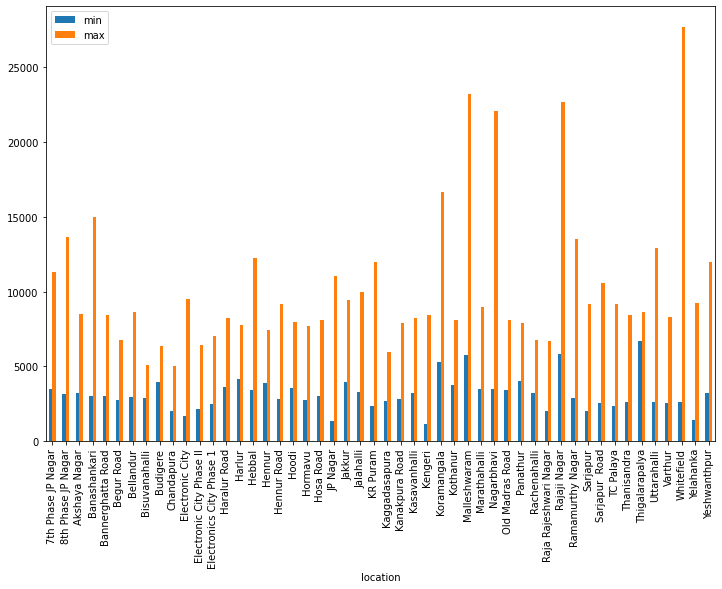

In [ ]:
df5.groupby('location')['PPS'].aggregate(['min','max']).plot.bar(figsize=(12,8))

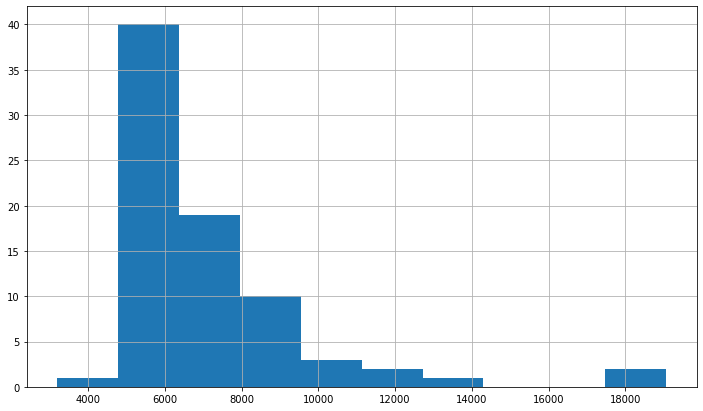

In [ ]:

df3[df3['location'] == 'Yeshwanthpur'].PPS.hist(figsize=(12,7))

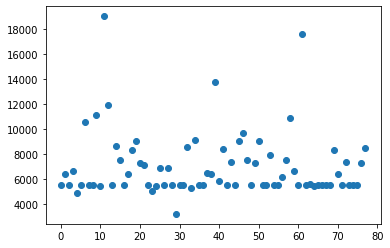

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(range(len(df3[df3['location'] == 'Yeshwanthpur'])) , df3[df3['location'] == 'Yeshwanthpur'].PPS)

plt.show()

In [ ]:
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0,3800.000000
1,Built-up Area,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0,6666.666667
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0,7322.834646
3,Built-up Area,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0,7042.253521
4,Built-up Area,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0,8108.108108


In [ ]:
df5.describe()


,size,total_sqft,bath,balcony,price,PPS
count,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000,5460.000000
mean,2.550000,1474.759865,2.458059,1.573626,89.270452,5613.867387
std,0.836666,758.221403,0.939788,0.781425,94.332799,2405.843356
min,1.000000,276.000000,1.000000,0.000000,9.000000,1166.666667
25%,2.000000,1115.000000,2.000000,1.000000,47.000000,4132.231405
50%,2.000000,1275.000000,2.000000,2.000000,65.280000,5172.016703
75%,3.000000,1620.000000,3.000000,2.000000,98.407500,6461.102325
max,9.000000,12000.000000,10.000000,3.000000,2200.000000,27692.307692


In [ ]:
# Remove PPS

In [ ]:
df6 = df5.drop('PPS',axis='columns')

In [ ]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0
1,Built-up Area,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0
3,Built-up Area,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0
4,Built-up Area,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0


In [ ]:
df6['area_type'].unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df6['area_type'].value_counts()

Super built-up  Area    4257
Built-up  Area           855
Plot  Area               323
Carpet  Area              25
Name: area_type, dtype: int64

In [ ]:
def fix_area_type(x):
  if x != 'Super built-up  Area':
   return 'Others'
  else:
   return x

In [ ]:
df6['area_type'] = df6['area_type'].apply(fix_area_type)

In [ ]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0
1,Others,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0
3,Others,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0
4,Others,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0


In [ ]:
# Do N coding over here so we can get numerical type

at = pd.get_dummies(df6['area_type'])
loc =  pd.get_dummies(df6['location'])

In [ ]:
df7 = pd.concat((df6,at,loc), axis=1)
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price,Others,Super built-up Area,7th Phase JP Nagar,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,Super built-up Area,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Others,7th Phase JP Nagar,2,1080.0,2.0,2.0,72.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,7th Phase JP Nagar,2,1270.0,2.0,2.0,93.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Others,7th Phase JP Nagar,3,1420.0,2.0,1.0,100.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Others,7th Phase JP Nagar,3,1850.0,3.0,1.0,150.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df7.drop(['area_type' , 'location'] , axis = 1)

,size,total_sqft,bath,balcony,price,Others,Super built-up Area,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,2,1000.0,2.0,1.0,38.00,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1080.0,2.0,2.0,72.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1270.0,2.0,2.0,93.00,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1420.0,2.0,1.0,100.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1850.0,3.0,1.0,150.00,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,3,2500.0,3.0,3.0,138.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5456,2,1160.0,2.0,2.0,64.08,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5457,3,2503.0,3.0,3.0,138.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5458,3,1855.0,3.0,3.0,135.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df8 = df7.drop(['area_type' , 'location'] , axis = 1)
df8.head()

,size,total_sqft,bath,balcony,price,Others,Super built-up Area,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,2,1000.0,2.0,1.0,38.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1080.0,2.0,2.0,72.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1270.0,2.0,2.0,93.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1420.0,2.0,1.0,100.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1850.0,3.0,1.0,150.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prepare model that can predict the price of an house

In [ ]:
# separate the features and labels

X = df8.drop('price' , axis='columns')
Y = df8['price']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =  train_test_split(X,Y)

In [ ]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# Predicted training accuracy

ytrain_pred = lmodel.predict(xtrain)
abs(ytrain - ytrain_pred).mean()

20.13096596537347

In [ ]:
# Predicted testing accuracy

ytest_pred = lmodel.predict(xtest)
abs(ytest - ytest_pred).mean()

24.123365456940927

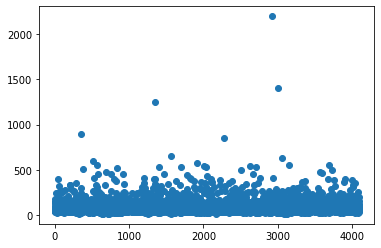

In [ ]:
plt.scatter(range(len(xtrain)) , ytrain)
plt.show()

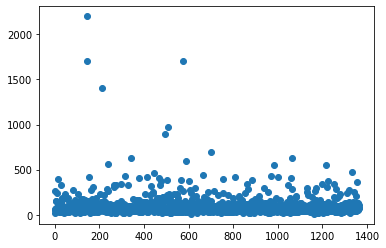

In [ ]:
plt.scatter(range(len(xtest)) , ytest)
plt.show()

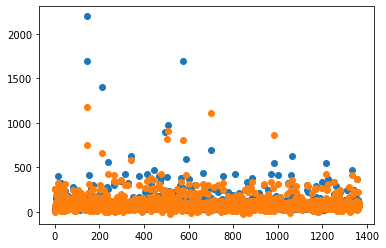

In [ ]:
plt.scatter(range(len(xtest)) , ytest)

plt.scatter(range(len(xtest)) , ytest_pred)

plt.show()

In [ ]:
ytest_pred.reshape(-1,1)

array([[ 58.89770889],
       [258.67701721],
       [ 78.12158585],
       ...,
       [ 60.07868958],
       [103.73522949],
       [ 71.14252853]])

In [ ]:
import numpy as np

np.hstack((ytest.values.reshape(-1,1),ytest_pred.reshape(-1,1)))

array([[ 48.        ,  58.89770889],
       [260.        , 258.67701721],
       [ 68.        ,  78.12158585],
       ...,
       [ 69.25      ,  60.07868958],
       [104.        , 103.73522949],
       [ 78.        ,  71.14252853]])

In [ ]:
import numpy as np

preds = np.hstack((ytest.values.reshape(-1,1),ytest_pred.reshape(-1,1)))
preds

array([[ 48.        ,  58.89770889],
       [260.        , 258.67701721],
       [ 68.        ,  78.12158585],
       ...,
       [ 69.25      ,  60.07868958],
       [104.        , 103.73522949],
       [ 78.        ,  71.14252853]])

In [ ]:
preds[0:20 , :]

array([[ 48.        ,  58.89770889],
       [260.        , 258.67701721],
       [ 68.        ,  78.12158585],
       [ 19.5       ,  -3.02284622],
       [157.        , 185.63902664],
       [150.        ,  79.64369965],
       [ 46.13      ,  74.21925735],
       [ 72.6       , 104.96865845],
       [ 45.        ,  70.97860336],
       [245.        , 242.83320618],
       [ 37.15      ,  28.86484528],
       [ 43.1       ,  46.52090836],
       [ 71.        ,  58.02174377],
       [123.        , 128.59486008],
       [ 60.        ,  64.91460037],
       [ 50.        ,  67.78735733],
       [399.        , 319.80427551],
       [ 68.        ,  79.53001785],
       [ 78.        ,  71.38774872],
       [ 36.54      ,  38.10071564]])

**for 90% cases are trying to be closer to the actual value**

# Prediction

In [ ]:
xtest.values[45]

array([2.000e+00, 1.109e+03, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00])

In [ ]:
xtrain.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'Others',
       'Super built-up  Area', '7th Phase JP Nagar', '8th Phase JP Nagar',
       'Akshaya Nagar', 'Banashankari', 'Bannerghatta Road', 'Begur Road',
       'Bellandur', 'Bisuvanahalli', 'Budigere', 'Chandapura',
       'Electronic City', 'Electronic City Phase II',
       'Electronics City Phase 1', 'Haralur Road', 'Harlur', 'Hebbal',
       'Hennur', 'Hennur Road', 'Hoodi', 'Hormavu', 'Hosa Road', 'JP Nagar',
       'Jakkur', 'Jalahalli', 'KR Puram', 'Kaggadasapura', 'Kanakpura Road',
       'Kasavanhalli', 'Kengeri', 'Koramangala', 'Kothanur', 'Malleshwaram',
       'Marathahalli', 'Nagarbhavi', 'Old Madras Road', 'Panathur',
       'Rachenahalli', 'Raja Rajeshwari Nagar', 'Rajaji Nagar',
       'Ramamurthy Nagar', 'Sarjapur', 'Sarjapur  Road', 'TC Palaya',
       'Thanisandra', 'Thigalarapalya', 'Uttarahalli', 'Varthur', 'Whitefield',
       'Yelahanka', 'Yeshwanthpur'],
      dtype='object')

**Create a function to predict the price by accepting the features**

In [ ]:
# First find out the columns then find their length

In [ ]:
size = 3
total_sqft = 1420.0
bath = 2
balcony = 3

area_type = 'Super built-up  Area'
location = 'Yelahanka'
 
input = np.zeros(len(xtrain.columns))

input[0] = size
input[1] = total_sqft
input[2] = bath 
input[3] = balcony

input[np.where(xtrain.columns == area_type)[0][0]] = 1
input[np.where(xtrain.columns == location)[0][0]] = 1

print(lmodel.predict([input]))


[66.20379639]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


* Changing the inputs we get different output

In [ ]:
  # Create a final function to make the model better

In [ ]:
def predict_price(size,sqft,bath,balcony,area,loc):
  input = np.zeros(len(xtrain.columns))

  input[0] = size
  input[1] = sqft
  input[2] = bath 
  input[3] = balcony


  input[np.where(xtrain.columns == area)[0][0]] = 1
  input[np.where(xtrain.columns == loc)[0][0]] = 1

  return (lmodel.predict([input]))

print(predict_price(3,1200,2,1,'Yelahanka','Super built-up  Area'))

[44.87372589]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
